# Project: Titanic Survival Exploration

In 1912, the ship RMS Titanic struck an iceberg on its maiden voyage and sank, resulting in the deaths of most of its passengers and crew. In this project, we will explore a subset of the RMS Titanic passenger manifest to determine which features best predict whether someone survived or did not survive.

# Getting Started

In [100]:
# Import libraries
import numpy as np
import pandas as pd
from IPython.display import display 

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the dataset
in_file = 'titanic_data.csv'
full_data = pd.read_csv(in_file)

# Print the first few entries of the RMS Titanic data
display(full_data.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


From a sample of the RMS Titanic data, the various features present for each passenger on the ship are:
- **Survived**: Outcome of survival (0 = No; 1 = Yes)
- **Pclass**: Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
- **Name**: Name of passenger
- **Sex**: Sex of the passenger
- **Age**: Age of the passenger (Some entries contain `NaN`)
- **SibSp**: Number of siblings and spouses of the passenger aboard
- **Parch**: Number of parents and children of the passenger aboard
- **Ticket**: Ticket number of the passenger
- **Fare**: Fare paid by the passenger
- **Cabin** Cabin number of the passenger (Some entries contain `NaN`)
- **Embarked**: Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)


In [101]:
# Store the 'Survived' feature in a new variable and remove it from the dataset
outcomes = full_data['Survived']
data = full_data.drop('Survived', axis = 1)

# Show the new dataset with 'Survived' removed
display(data.head())

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Accuracy 

In [102]:
def accuracy_score(truth, pred):
    """ Returns accuracy score for input truth and predictions. """
    
    # Ensure that the number of predictions matches number of outcomes
    if len(truth) == len(pred): 
        
        # Calculate and return the accuracy as a percent
        return "Predictions have an accuracy of {:.2f}%.".format((truth == pred).mean()*100)
    
    else:
        return "Number of predictions does not match number of outcomes!"
    
# Test the 'accuracy_score' function
predictions = pd.Series(np.ones(5, dtype = int))
print accuracy_score(outcomes[:5], predictions)

Predictions have an accuracy of 60.00%.


# Making Predictions

In [103]:
def predictions_0(data):
    """ Model with no features. Always predicts a passenger did not survive. """

    predictions = []
    for _, passenger in data.iterrows():
        
        # Predict the survival of 'passenger'
        predictions.append(0)
    
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_0(data)

In [104]:
print accuracy_score(outcomes, predictions)

Predictions have an accuracy of 61.62%.


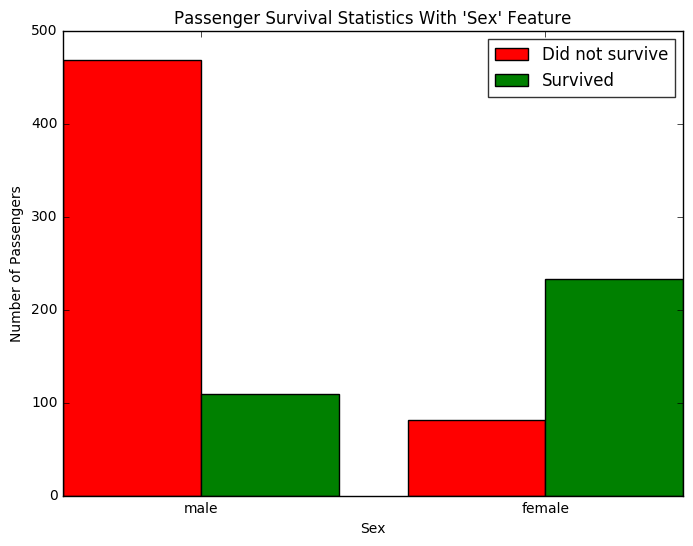

In [105]:
vs.survival_stats(data, outcomes, 'Sex')

Examining the survival statistics, a large majority of males did not survive the ship sinking. However, a majority of females *did* survive the ship sinking.

In [106]:
def predictions_1(data):
    """ Model with one feature: 
            - Predict a passenger survived if they are female. """
    
    predictions = []
    for _, passenger in data.iterrows():
        
        if passenger['Sex'] == 'female':
            predictions.append(1)
        else:
            predictions.append(0)
        
    
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_1(data)

In [107]:
print accuracy_score(outcomes, predictions)

Predictions have an accuracy of 78.68%.


***
Using just the **Sex** feature for each passenger, we are able to increase the accuracy of our predictions by a significant margin.

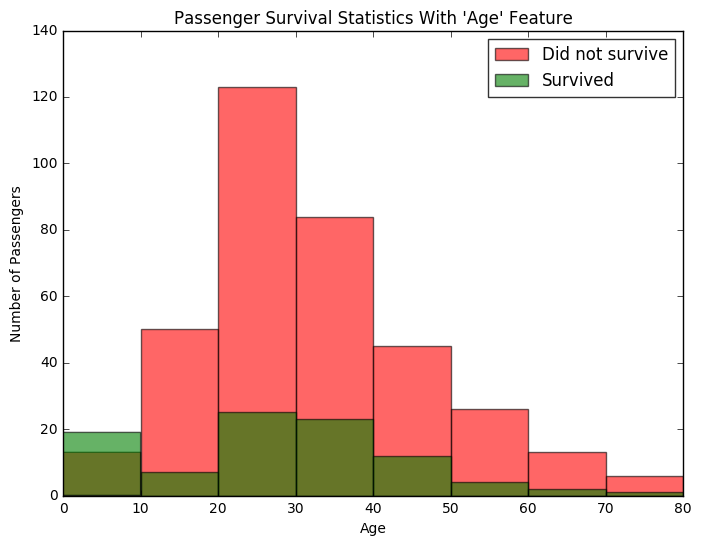

In [108]:
vs.survival_stats(data, outcomes, 'Age', ["Sex == 'male'"])

Examining the survival statistics, the majority of males younger than 10 survived the ship sinking, whereas most males age 10 or older *did not survive* the ship sinking.

In [109]:
def predictions_2(data):
    """ Model with two features: 
            - Predict a passenger survived if they are female.
            - Predict a passenger survived if they are male and younger than 10. """
    
    predictions = []
    for _, passenger in data.iterrows():
        
        if (passenger['Sex'] == 'female') or (passenger['Sex'] == 'male' and passenger['Age'] <10):
            predictions.append(1)
        else:
            predictions.append(0)
    
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_2(data)

In [110]:
print accuracy_score(outcomes, predictions)

Predictions have an accuracy of 79.35%.


***
Adding the feature **Age** as a condition in conjunction with **Sex** improves the accuracy by a small margin more than with simply using the feature **Sex** alone.

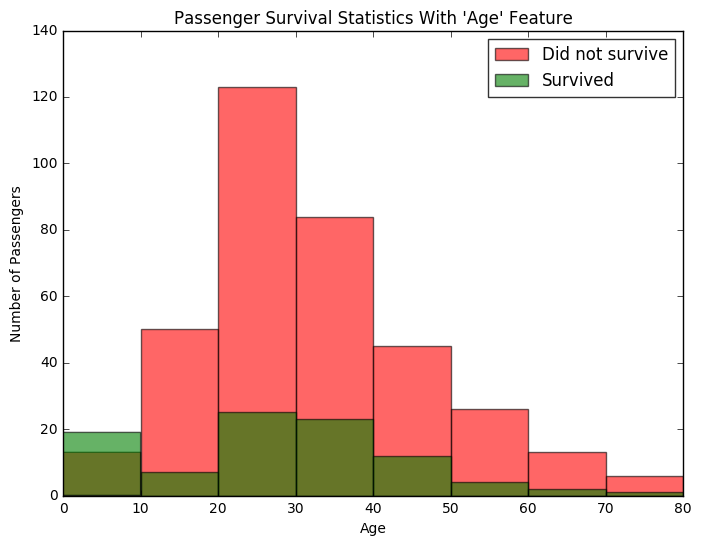

In [111]:
vs.survival_stats(data, outcomes, 'Age', ["Sex == 'male'"])

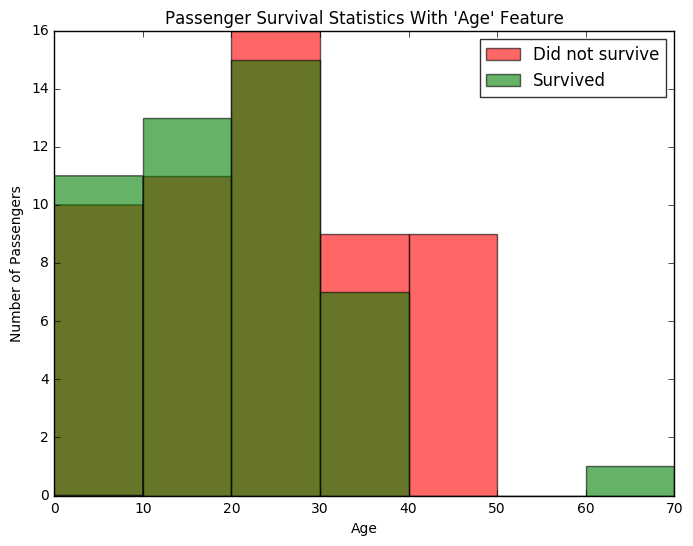

In [112]:
vs.survival_stats(data, outcomes, 'Age', ["Sex == 'female'","Pclass == 3"])

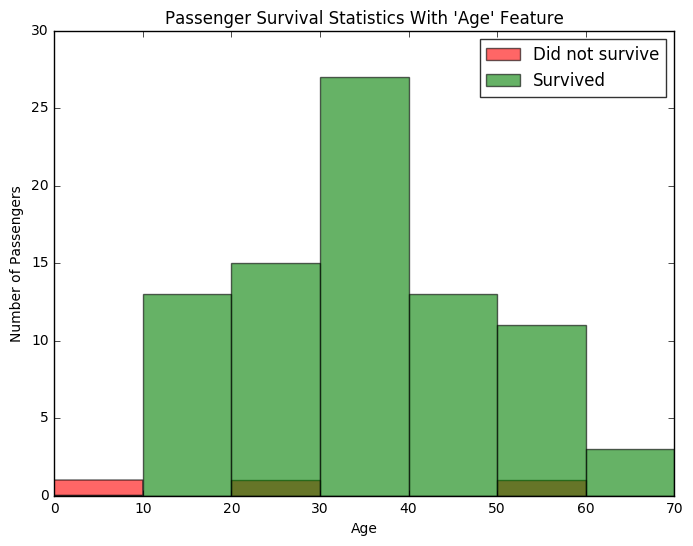

In [113]:
vs.survival_stats(data, outcomes, 'Age', ["Sex == 'female'","Pclass == 1"])

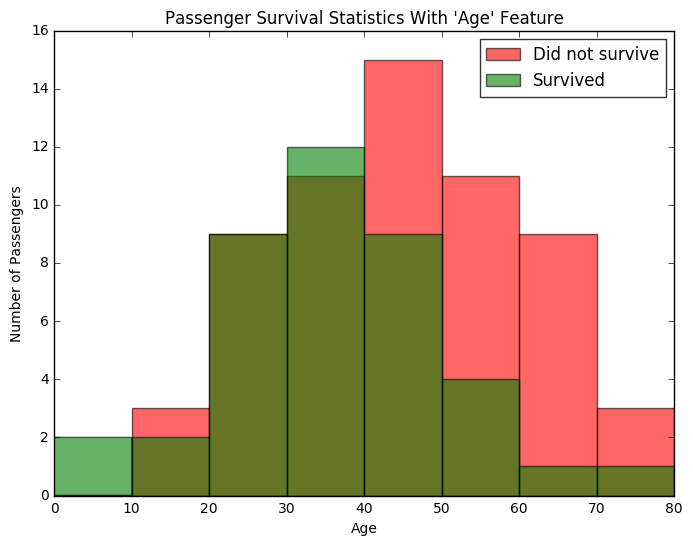

In [114]:
vs.survival_stats(data, outcomes, 'Age', ["Sex == 'male'","Pclass == 1"])

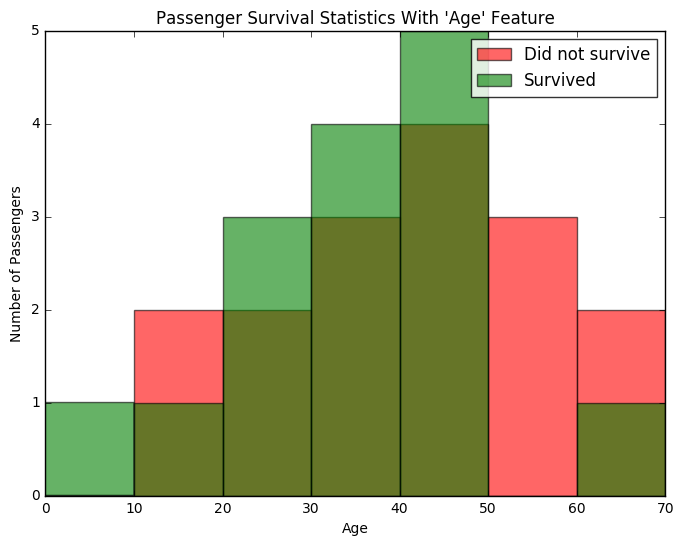

In [115]:
vs.survival_stats(data, outcomes, 'Age', ["Sex == 'male'","Pclass == 1", "SibSp == 1"]) 

In [116]:
def predictions_3(data):
    """ Model with multiple features. Makes a prediction with an accuracy of at least 80%. """
    
    predictions = []
    for _, passenger in data.iterrows():
        if (passenger['Sex'] == 'female'):
            if ((passenger['Age'] > 40 and passenger['Age'] < 50) and passenger['Pclass'] == 3):
                predictions.append(0)
            elif (passenger['Age'] < 10 and passenger['Pclass'] == 1):
                predictions.append(0)
            else:
                predictions.append(1)    
        elif (passenger['Sex'] == 'male'):
            if( passenger['Age'] < 10 ):
                predictions.append(1)
            elif ((passenger['Age'] > 20 and passenger['Age']< 40)and passenger['Pclass'] == 1):
                predictions.append(1)
            elif ((passenger['Age'] > 40 and passenger['Age']< 50)and passenger['Pclass'] == 1) and (passenger['SibSp'] == 1):
                predictions.append(1)
            else:
                predictions.append(0)  
        else:
            predictions.append(0)
    
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_3(data)

In [99]:
print accuracy_score(outcomes, predictions)

Predictions have an accuracy of 80.58%.
